In [1]:
# load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from math import nan # importing nan to avoid overlapping in plotting datas
from datetime import datetime
# from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# path of our dataframe
data_path =  "temperatura1_A.csv"

In [ ]:
# RUN ON COLAB
# change me, have to point to the Meteotrentino drive folder
wk =  "/content/drive/My Drive/10. Meteotrentino/"

# folder for the csv
subfolder = "Dati csv convalidati/"

# select the filename, make me dynamic
selected_dataset = "temperatura1_A.csv"

data_path = wk+subfolder+selected_dataset

In [3]:
# select the filename of the dataset (Dario: dont judge me)
selected_dataset = os.path.basename(data_path).split('_A')[0] 
if selected_dataset > "vel":
  dataset_sensor = "vento"
elif selected_dataset > "umidita":
  dataset_sensor = "umidità"
elif selected_dataset > "temperatura":    
  dataset_sensor = "temperatura"
elif selected_dataset > "radiazione":
  dataset_sensor = "radiazione"
elif selected_dataset > "pioggia":
  dataset_sensor = "pioggia"
elif selected_dataset > "direzione":
  dataset_sensor = "vento"
else:
  dataset_sensor = "Altezza neve"
print(dataset_sensor)

temperatura


In [4]:
# loading in pandas dataframe
df = pd.read_csv(
  data_path,
  sep = ";", # not a CSV, separator is ';'
  header = None, # no header
  dtype = {'0' : str, '1': str, '2': str, '3' : np.float64, '4':int}
  ) 


In [5]:
# define a header 
df= df.set_axis(
    ['label', 'date', 'time', 'value','validation_code'],
    axis = 1,
    inplace = False

)

/tmp/ipykernel_1775030/3586892922.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df= df.set_axis(


In [6]:
df['datetime'] = pd.to_datetime(df['date']+" "+df['time'], format = '%d/%m/%Y %H:%M')

In [7]:
df #Printing table

,label,date,time,value,validation_code,datetime
0,T0009,01/01/2014,00:00,-2.1,1,2014-01-01 00:00:00
1,T0009,01/01/2014,00:15,-2.3,1,2014-01-01 00:15:00
2,T0009,01/01/2014,00:30,-2.2,1,2014-01-01 00:30:00
3,T0009,01/01/2014,00:45,-2.3,1,2014-01-01 00:45:00
4,T0009,01/01/2014,01:00,-2.5,1,2014-01-01 01:00:00
...,...,...,...,...,...,...
11763686,T0227,31/12/2021,22:45,8.1,1,2021-12-31 22:45:00
11763687,T0227,31/12/2021,23:00,8.2,1,2021-12-31 23:00:00
11763688,T0227,31/12/2021,23:15,8.1,1,2021-12-31 23:15:00
11763689,T0227,31/12/2021,23:30,8.0,1,2021-12-31 23:30:00


In [66]:
date_start = "24/08/2016" #@param {type:"string"}
date_end = "25/08/2016" #@param {type:"string"}
station_num = "T0059" #@param {type:"string"}

df['date'] = pd.to_datetime(df['date'], format = '%d/%m/%Y')

# Converting string in to datetime
date_start = datetime.strptime(date_start, '%d/%m/%Y')
date_end = datetime.strptime(date_end, '%d/%m/%Y')

df_filtered = df[(df['label'] == station_num) &
         (df['date'] >= date_start) & 
         (df['date'] <= date_end) ]


# Create a dataframe of only that station in that day
df_filtered = df[(df['label'] == station_num) &
         (df['date'] >= date_start) & 
         (df['date'] <= date_end)]
# Inserting the 00:00 value of the next day
nextrow = df_filtered.index[0] + len(df_filtered.index)
df_filtered = df_filtered.append(df.iloc[nextrow],ignore_index = True)

df_filtered

/tmp/ipykernel_1775030/1820461353.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_filtered = df_filtered.append(df.iloc[nextrow],ignore_index = True)


,label,date,time,value,validation_code,datetime
0,T0059,2016-08-24,00:00,11.9,1,2016-08-24 00:00:00
1,T0059,2016-08-24,00:15,11.8,1,2016-08-24 00:15:00
2,T0059,2016-08-24,00:30,11.8,1,2016-08-24 00:30:00
3,T0059,2016-08-24,00:45,12.0,1,2016-08-24 00:45:00
4,T0059,2016-08-24,01:00,11.7,1,2016-08-24 01:00:00
...,...,...,...,...,...,...
188,T0059,2016-08-25,23:00,13.5,1,2016-08-25 23:00:00
189,T0059,2016-08-25,23:15,12.9,1,2016-08-25 23:15:00
190,T0059,2016-08-25,23:30,12.8,1,2016-08-25 23:30:00
191,T0059,2016-08-25,23:45,13.0,1,2016-08-25 23:45:00


In [67]:
# Split good and bad data into 2 samples 
y_signal = df_filtered.value
y_outliers = np.where(df_filtered["validation_code"] == 1, nan, df_filtered.value)

In [73]:
# Define the x axis value
x_range = range(len(df_filtered.time))
df_filtered["ax"] = df_filtered.datetime.astype(str)
df_filtered["axlabel"] = df_filtered["ax"]

for i in range(df_filtered.index[0], (df_filtered.index[0] + len(df_filtered.index))):
    df_filtered["ax"][i] = os.path.basename(df_filtered["ax"][i]).split('-')[2]
    df_filtered["axlabel"][i] = os.path.basename(df_filtered["axlabel"][i]).split('-')[2]
    df_filtered["axlabel"][i] = os.path.basename(df_filtered["axlabel"][i]).split(':')[0] +":"+ os.path.basename(df_filtered["axlabel"][i]).split(':')[1]

x_plot = np.array(df_filtered.ax)

df_filtered

/tmp/ipykernel_1775030/1666293189.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["ax"][i] = os.path.basename(df_filtered["ax"][i]).split('-')[2]
/tmp/ipykernel_1775030/1666293189.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["axlabel"][i] = os.path.basename(df_filtered["axlabel"][i]).split('-')[2]
/tmp/ipykernel_1775030/1666293189.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["axlabe

,label,date,time,value,validation_code,datetime,ax,axlabel
0,T0059,2016-08-24,00:00,11.9,1,2016-08-24 00:00:00,24 00:00:00,24 00:00
1,T0059,2016-08-24,00:15,11.8,1,2016-08-24 00:15:00,24 00:15:00,24 00:15
2,T0059,2016-08-24,00:30,11.8,1,2016-08-24 00:30:00,24 00:30:00,24 00:30
3,T0059,2016-08-24,00:45,12.0,1,2016-08-24 00:45:00,24 00:45:00,24 00:45
4,T0059,2016-08-24,01:00,11.7,1,2016-08-24 01:00:00,24 01:00:00,24 01:00
...,...,...,...,...,...,...,...,...
188,T0059,2016-08-25,23:00,13.5,1,2016-08-25 23:00:00,25 23:00:00,25 23:00
189,T0059,2016-08-25,23:15,12.9,1,2016-08-25 23:15:00,25 23:15:00,25 23:15
190,T0059,2016-08-25,23:30,12.8,1,2016-08-25 23:30:00,25 23:30:00,25 23:30
191,T0059,2016-08-25,23:45,13.0,1,2016-08-25 23:45:00,25 23:45:00,25 23:45


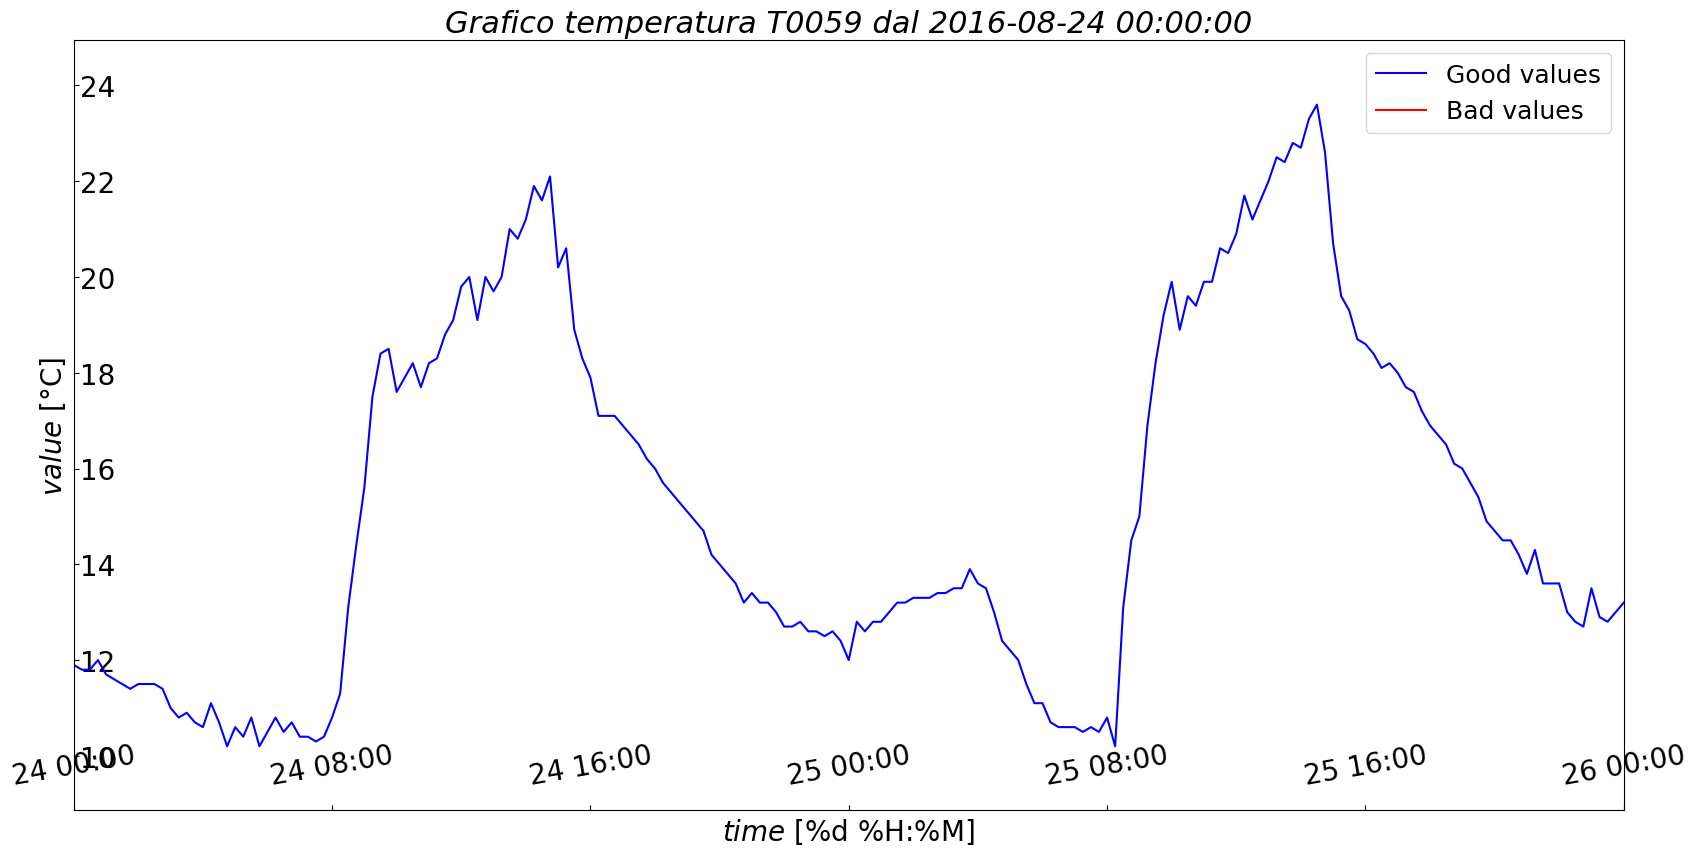

In [75]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Shapes sizes
figure_width = 20 #@param {type:"integer"}
figure_height = 10 #@param {type:"integer"}
x_margin = 0 #@param {type:"number"}
y_margin = 0.1 #@param {type:"number"}

# Setting font
font ="Verdana" #@param {type:"string"}
plt.rc(font)

# Styling text
title_fontsize = 22 #@param {type:"integer"}
label_fontsize = 20 #@param {type:"integer"}
legend_size = 18 #@param {type:"integer"}
axis_fontsize = 20 #@param {type:"integer"}
label_xmargin = -50 #@param {type:"integer"}
label_ymargin = -30 #@param {type:"integer"}
x_rotation_label = 10 #@param {type:"integer"}

# Set unit
x_unit = "%d %H:%M" #@param {type:"string"}
y_unit = "°C" #@param {type:"string"}

# Set tick 
x_tick = 32 #@param {type:"integer"} cambia in base al dataset 1 ogni 15' (32), ogni 10' (48), ogni 5' (96)

# Reshaping the plot
f = plt.figure()
f.set_figwidth(figure_width)
f.set_figheight(figure_height)

# Create subplot
ax = plt.subplot()

# Set labels
plt.title('Grafico '+ dataset_sensor +' ' +station_num + ' dal ' + str(date_start) ,fontsize = title_fontsize, style = 'italic')
plt.xlabel('$\it{time}$' + ' [' + x_unit +']', fontsize = axis_fontsize) #se tutto in corsivo style = 'italic' 
plt.ylabel('$\it{value}$' + ' [' + y_unit +']', fontsize = axis_fontsize)
ax.tick_params(axis="y",direction="in",pad=label_ymargin)
plt.xticks(np.arange(0, df_filtered.shape[0], 32),fontsize=label_fontsize,rotation = x_rotation_label)
plt.yticks(np.arange(0, ceil(max(y_signal))+2, 2),fontsize=label_fontsize)
ax.tick_params(axis="x",direction="in",pad=label_xmargin)

# create tick label
x_tick_label = []
i = 0
while i < len(df_filtered):
    x_tick_label.append(df_filtered.axlabel[i])
    i = i + 32
ax.set_xticklabels(x_tick_label)

# Plotting datas
plt.plot(x_plot, y_signal, "-",ms=8,color="blue")	
plt.plot(x_plot, y_outliers, "-",ms=8,mew=5,color="red")

# Making a legend
ax.legend(['Good values', 'Bad values'], prop={'size': legend_size})

plt.margins(x=x_margin, y=y_margin)

#Saving as PDF
my_file = selected_dataset + "_" + station_num + '.pdf'
#savewk = '/content/drive/My Drive/10. Meteotrentino/ReportPlots' #Colab
savewk = "" #local
plt.savefig(os.path.join(savewk, my_file), bbox_inches='tight')    

# Visualize
plt.show()